In [2]:
%matplotlib inline

In [3]:
path = "data/dogscats-redux/"

In [4]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [5]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [6]:
batch_size=64

In [7]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [8]:
vgg = Vgg16()

In [9]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 22776 images belonging to 2 classes.


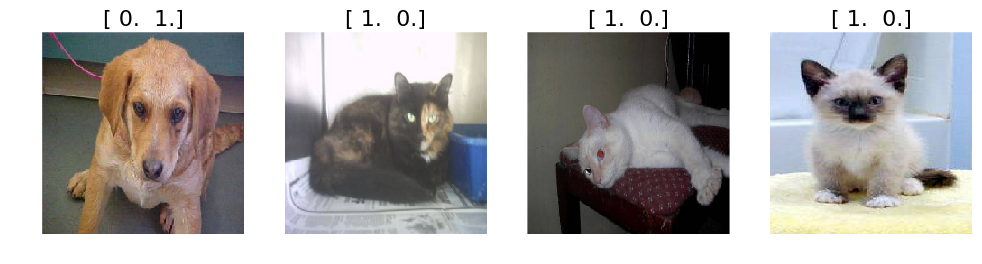

In [10]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [11]:
vgg.predict(imgs, True)

(array([ 0.5245,  0.1812,  0.1423,  0.9877], dtype=float32),
 array([207, 281, 332, 284]),
 [u'golden_retriever', u'tabby', u'Angora', u'Siamese_cat'])

In [12]:
vgg.finetune(batches)

In [13]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 2200 images belonging to 2 classes.


In [14]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
22776/22776 [==============================] - 664s - loss: 0.2304 - acc: 0.9705 - val_loss: 0.1941 - val_acc: 0.9805


In [15]:
vgg.predict(imgs, True)

(array([ 1.,  1.,  1.,  1.], dtype=float32),
 array([1, 0, 0, 0]),
 ['dogs', 'cats', 'cats', 'cats'])

In [32]:
batches = vgg.get_batches(path+'train', batch_size=32, shuffle=False)
imgs,labels = next(batches)
results = vgg.predict(imgs, True)

Found 22776 images belonging to 2 classes.


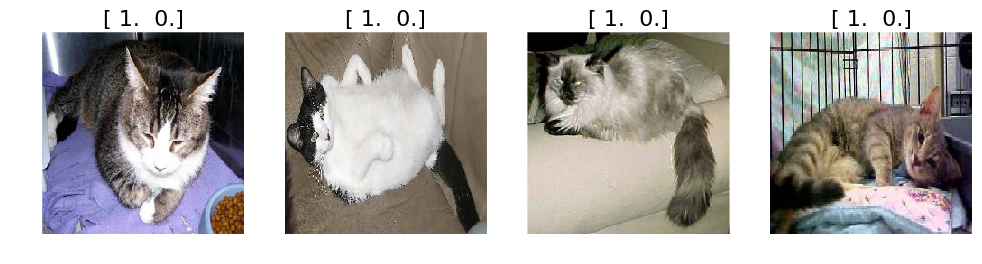

In [33]:
plots(imgs[0:4], titles=labels[0:4])

In [41]:
batches, preds = vgg.test(path+'test', batch_size = 32)

Found 12500 images belonging to 1 classes.


In [44]:
#Save our test results arrays so we can use them again later
filenames = batches.filenames
np.save(path + 'test_preds.dat', preds)
np.save(path + 'filenames.dat', filenames)

In [49]:
preds

array([[  1.0000e+00,   1.2281e-36],
       [  9.9999e-01,   1.0085e-05],
       [  1.0000e+00,   3.2340e-37],
       ..., 
       [  1.0000e+00,   2.2421e-44],
       [  1.0000e+00,   1.4013e-45],
       [  4.5341e-20,   1.0000e+00]], dtype=float32)

In [59]:
batches.filenames
ids = np.array([int(f[7:f.find('.')]) for f in filenames])
print(ids[:5])
print(filenames[:5])

[ 9292 12026  9688  4392   779]
['unkown/9292.jpg', 'unkown/12026.jpg', 'unkown/9688.jpg', 'unkown/4392.jpg', 'unkown/779.jpg']


In [63]:
isdog = preds[:,1]

In [64]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

array([[  9.2920e+03,   1.2281e-36],
       [  1.2026e+04,   1.0085e-05],
       [  9.6880e+03,   3.2340e-37],
       [  4.3920e+03,   2.8026e-45],
       [  7.7900e+02,   1.0000e+00]])

In [65]:
np.savetxt(path+'submission.csv', subm, fmt='%d,%.5f', header='id,label', comments='')